# Day 8
batch size 256 lr 1e-3, normed weighted, rotated, cartesian, reflection augmentation

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


## Options

In [2]:
classTrainFeatures = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']
inputPipe, outputPipe = getPreProcPipes(normIn=True)
classModel = 'modelSwish'
varSet = "basic_rot_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 200
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs, 'mode':'classifier'}

print "\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures]


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [3]:
trainData = h5py.File(dirLoc + 'train.hdf5', "r+")
valData = h5py.File(dirLoc + 'val.hdf5', "r+")

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 1.108s 


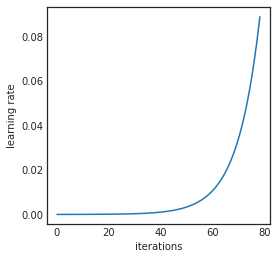

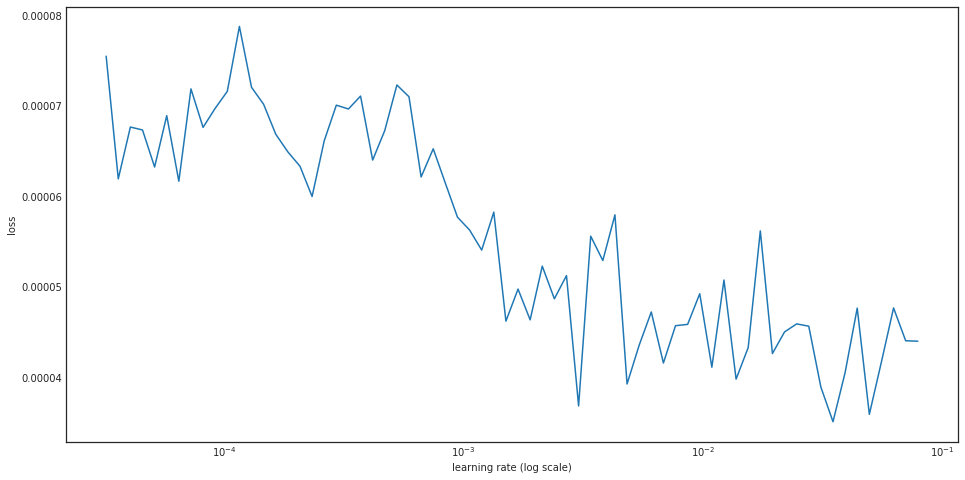

______________________________________



In [5]:
lrFinder = batchLRFind(trainData, nSplits, getModel, modelParams, trainParams, mode='classifier',
                       getBatch=getReflectBatch, batchArgs={'header':classTrainFeatures},
                       lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

In [7]:
compileArgs['lr'] = 1e-3

## Train classifier

Using cosine annealing
Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 4.48224617653e-05
2 New best found: 3.94519852975e-05
3 New best found: 3.82195262574e-05
4 New best found: 3.73869233561e-05
5 New best found: 3.62842919401e-05
6 New best found: 3.58876993436e-05
7 New best found: 3.57370712024e-05
8 New best found: 3.5565200863e-05
9 New best found: 3.54069371315e-05
11 New best found: 3.48320198192e-05
12 New best found: 3.45711495637e-05
13 New best found: 3.44827647278e-05
15 New best found: 3.43462080951e-05
18 New best found: 3.41871891207e-05
20 New best found: 3.39736856457e-05
22 New best found: 3.38215893835e-05
24 New best found: 3.36952684315e-05
26 New best found: 3.36317637478e-05
27 New best found: 3.33945157879e-05
30 New best found: 3.33622844625e-05
40 New best found: 3.32224896799e-05
44 New best found: 3.29241047873e-05
50 New best found: 3.2855068955e-05
53 New best found: 3.28463598263e-05
54 New best foun

58 New best found: 3.26021233292e-05
61 New best found: 3.25842711893e-05
62 New best found: 3.25810462482e-05
91 New best found: 3.24699501424e-05
98 New best found: 3.24407635025e-05
102 New best found: 3.24185882933e-05
103 New best found: 3.23933620789e-05
104 New best found: 3.23510345463e-05
106 New best found: 3.22992195331e-05
111 New best found: 3.22350416514e-05
114 New best found: 3.21721709757e-05
194 New best found: 3.19786841483e-05
223 New best found: 3.19437117261e-05
228 New best found: 3.19120314852e-05
252 New best found: 3.18091575299e-05
Early stopping after 511 epochs
Score is: {'loss': 3.180915752988117e-05, 'AUC': 0.09863035472900039, 'wAUC': 0.06428332316496255}
Fold took 469.893s

Running fold 6 / 10
1 New best found: 4.41006956137e-05
2 New best found: 3.89624800966e-05
3 New best found: 3.83599130396e-05
4 New best found: 3.75069356593e-05
5 New best found: 3.56600547434e-05
6 New best found: 3.52925756835e-05
8 New best found: 3.51923715751e-05
10 New best 

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109169). Check your callbacks.
  % delta_t_median)


1 New best found: 4.4050057021e-05
2 New best found: 3.82875787764e-05
3 New best found: 3.75604062862e-05
4 New best found: 3.65107407721e-05
6 New best found: 3.57061304943e-05
7 New best found: 3.55755672924e-05
9 New best found: 3.54574463704e-05
10 New best found: 3.51939869621e-05
11 New best found: 3.51098010314e-05
12 New best found: 3.4483052715e-05
13 New best found: 3.42411163364e-05
15 New best found: 3.40735526693e-05
20 New best found: 3.3676526422e-05
22 New best found: 3.35237657338e-05
23 New best found: 3.34391283582e-05
26 New best found: 3.32166545991e-05
28 New best found: 3.31995814261e-05
29 New best found: 3.31489109656e-05
30 New best found: 3.31459094667e-05
31 New best found: 3.29422111409e-05
41 New best found: 3.28999466814e-05
45 New best found: 3.26309692986e-05
49 New best found: 3.26185466829e-05
50 New best found: 3.25875159199e-05
51 New best found: 3.24969857758e-05
53 New best found: 3.2449662029e-05
56 New best found: 3.24473368669e-05
57 New best 

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125061). Check your callbacks.
  % delta_t_median)


1 New best found: 4.32681348349e-05
2 New best found: 3.86289031353e-05
3 New best found: 3.77232173465e-05
4 New best found: 3.68711974463e-05
5 New best found: 3.59703869214e-05
6 New best found: 3.53177013932e-05
10 New best found: 3.50244198525e-05
11 New best found: 3.46147767339e-05
12 New best found: 3.43501648009e-05
13 New best found: 3.41968061404e-05
15 New best found: 3.40546912988e-05
20 New best found: 3.39477218897e-05
23 New best found: 3.37451296937e-05
24 New best found: 3.34756175553e-05
27 New best found: 3.33791355286e-05
28 New best found: 3.33164330234e-05
29 New best found: 3.32928127389e-05
30 New best found: 3.32651847731e-05
31 New best found: 3.32501473338e-05
42 New best found: 3.32201272498e-05
44 New best found: 3.3154090263e-05
46 New best found: 3.31198556956e-05
48 New best found: 3.30769497253e-05
49 New best found: 3.28437191991e-05
54 New best found: 3.28300980784e-05
55 New best found: 3.2744913918e-05
57 New best found: 3.27407208168e-05
58 New be

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135555). Check your callbacks.
  % delta_t_median)


1 New best found: 4.36525442843e-05
2 New best found: 3.88581153269e-05
3 New best found: 3.81859819432e-05
4 New best found: 3.81085179409e-05
5 New best found: 3.63023405556e-05
6 New best found: 3.57787194267e-05
10 New best found: 3.5642358926e-05
11 New best found: 3.4849242053e-05
12 New best found: 3.47615081723e-05
13 New best found: 3.46548829874e-05
14 New best found: 3.4576994116e-05
15 New best found: 3.44561903992e-05
22 New best found: 3.42645290248e-05
23 New best found: 3.40138787391e-05
25 New best found: 3.3831580944e-05
26 New best found: 3.36053473123e-05
43 New best found: 3.35572479174e-05
45 New best found: 3.34320667553e-05
46 New best found: 3.33384876306e-05
47 New best found: 3.33141985104e-05
49 New best found: 3.31245292765e-05
52 New best found: 3.30636385767e-05
53 New best found: 3.29752625471e-05
58 New best found: 3.29271945412e-05
60 New best found: 3.29219772435e-05
99 New best found: 3.27849844687e-05
103 New best found: 3.26659160848e-05
112 New be

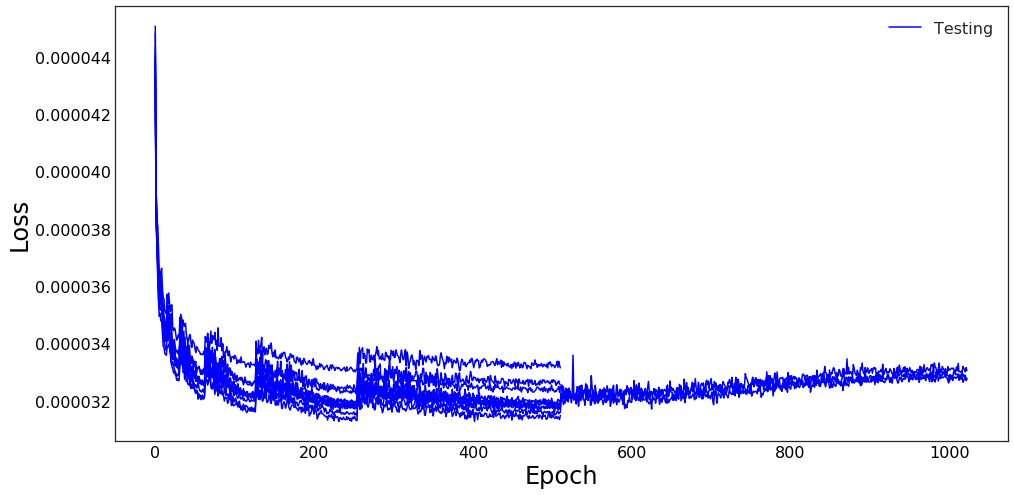

Mean wAUC = 0.0644 +- 0.0006
______________________________________



In [8]:
results, histories = batchTrainClassifier(trainData, nSplits, getModel, modelParams, trainParams,
                                          patience=2, cosAnnealMult=2, trainOnWeights=True,
                                          getBatch=getReflectBatch, batchArgs={'header':classTrainFeatures},
                                          maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [11]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [12]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 5 with loss = 3.12789217824987e-05
Model 1 is 3 with loss = 3.1467725760369305e-05
Model 2 is 8 with loss = 3.1642309561426534e-05
Model 3 is 7 with loss = 3.167499018049918e-05
Model 4 is 6 with loss = 3.169404135356904e-05
Model 5 is 0 with loss = 3.1696650678322904e-05
Model 6 is 4 with loss = 3.180915752988117e-05
Model 7 is 1 with loss = 3.224078930664414e-05
Model 8 is 9 with loss = 3.232320109893497e-05
Model 9 is 2 with loss = 3.301171402815666e-05


In [17]:
np.mean([3.12789217824987e-05,
3.1467725760369305e-05,
3.1642309561426534e-05,
3.167499018049918e-05,
3.169404135356904e-05,
3.1696650678322904e-05,
3.180915752988117e-05,
3.224078930664414e-05,
3.232320109893497e-05,
3.301171402815666e-05])

3.188395012803026e-05

## Response on development data

In [100]:
class BatchYielder():
    def __init__(self, datafile=None):
        self.augmented = False
        self.augMult = 0
        self.trainTimeAug = False
        self.testTimeAug = False
        if not isinstance(datafile, types.NoneType):
            self.addSource(datafile)

    def addSource(self, datafile):
        self.source = datafile

    def getBatch(self, index, datafile=None):
        if isinstance(datafile, types.NoneType):
            datafile = self.source

        index = str(index)
        weights = None
        targets = None
        if 'fold_' + index + '/weights' in datafile:
            weights = np.array(datafile['fold_' + index + '/weights'])
        if 'fold_' + index + '/targets' in datafile:
            targets = np.array(datafile['fold_' + index + '/targets'])
        return {'inputs':np.array(datafile['fold_' + index + '/inputs']),
                'targets':targets,
                'weights':weights}

In [139]:
class ReflectBatch(BatchYielder):
    def __init__(self, header, datafile=None, trainTimeAug=True, testTimeAug=True):
        self.header = header
        self.augmented = True
        self.augMult = 8
        self.trainTimeAug = trainTimeAug
        self.testTimeAug = testTimeAug
        if not isinstance(datafile, types.NoneType):
            self.addSource(datafile)
        
    def getBatch(self, index, datafile=None):
        if isinstance(datafile, types.NoneType):
            datafile = self.source
            
        index = str(index)
        weights = None
        targets = None
        if 'fold_' + index + '/weights' in datafile:
            weights = np.array(datafile['fold_' + index + '/weights'])
        if 'fold_' + index + '/targets' in datafile:
            targets = np.array(datafile['fold_' + index + '/targets'])

        inputs = pandas.DataFrame(np.array(datafile['fold_' + index + '/inputs']), columns=self.header)
        for coord in ['_px','_py','_pz']:
            inputs['aug' + coord] = np.random.randint(0, 2, size=len(inputs))
            for feat in [x for x in inputs.columns if coord in x and x != 'aug' + coord]:
                inputs.loc[inputs['aug' + coord] == 1, feat] = -inputs.loc[inputs['aug' + coord] == 1, feat]

        return {'inputs':inputs[self.header].values,
                'targets':targets,
                'weights':weights}
    
    def getTestBatch(self, index, augIndex, datafile=None):
        if augIndex >= self.augMult:
            print "Invalid augmentation index passed", augIndex
            return -1
        
        if isinstance(datafile, types.NoneType):
            datafile = self.source
            
        index = str(index)
        weights = None
        targets = None
        if 'fold_' + index + '/weights' in datafile:
            weights = np.array(datafile['fold_' + index + '/weights'])
        if 'fold_' + index + '/targets' in datafile:
            targets = np.array(datafile['fold_' + index + '/targets'])

        augMode = '{0:03b}'.format(augIndex) #Get binary rep
        inputs = pandas.DataFrame(np.array(datafile['fold_' + index + '/inputs']), columns=self.header)
        coords = ['_px','_py','_pz']
        for coordIndex, active in enumerate(augMode):
            if active == '1':
                for feat in [x for x in inputs.columns if coords[coordIndex] in x]:
                    inputs.loc[:, feat] = -inputs.loc[:, feat]

        return {'inputs':inputs[self.header].values,
                'targets':targets,
                'weights':weights}

In [143]:
def batchEnsemblePredict(ensemble, weights, data, predName='pred', nOut=1, outputPipe=None, ensembleSize=None, nFolds=-1, verbose=False):
    if isinstance(ensembleSize, types.NoneType):
        ensembleSize = len(ensemble)

    if not isinstance(data, BatchYielder):
        data = BatchYielder(data)

    if nFolds < 0:
        nFolds = len(data.source)

    for fold in range(nFolds):
        if verbose:
            print 'Predicting batch {} out of {}'.format(fold+1, nFolds)
            start = timeit.default_timer()

        if not data.testTimeAug:
            batch = data.getBatch(fold)['inputs']
            batchPred = ensemblePredict(batch, ensemble, weights, n=ensembleSize, nOut=nOut, outputPipe=outputPipe)

        else:
            tmpPred = []
            for aug in range(data.augMult):
                batch = data.getTestBatch(fold, aug)['inputs']
                tmpPred.append(ensemblePredict(batch, ensemble, weights, n=ensembleSize, nOut=nOut, outputPipe=outputPipe))
            batchPred = np.mean(tmpPred, axis=0)

        if verbose: 
            print "Prediction took {}s per sample\n".format((timeit.default_timer() - start)/len(batch))

        if nOut > 1:
            saveBatchPred(batchPred, 'fold_' + str(fold), data.source, predName=predName)
        else:
            saveBatchPred(batchPred[:,0], 'fold_' + str(fold), data.source, predName=predName)

In [146]:
batchEnsemblePredict(ensemble, weights, ReflectBatch(classTrainFeatures, trainData), ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.00177457351564s per sample

Predicting batch 2 out of 10
Prediction took 0.00263387440121s per sample

Predicting batch 3 out of 10
Prediction took 0.00207894000165s per sample

Predicting batch 4 out of 10
Prediction took 0.00207876110077s per sample

Predicting batch 5 out of 10
Prediction took 0.00177338020802s per sample

Predicting batch 6 out of 10
Prediction took 0.00221340340376s per sample

Predicting batch 7 out of 10
Prediction took 0.00209012744427s per sample

Predicting batch 8 out of 10
Prediction took 0.00212102780623s per sample

Predicting batch 9 out of 10
Prediction took 0.00211918970973s per sample

Predicting batch 10 out of 10
Prediction took 0.0020556553369s per sample



In [147]:
print 'Training ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData)),
                                                            roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData), sample_weight=getFeature('weights', trainData)))

Training ROC AUC: unweighted 0.903900435781, weighted 0.93958697136


## Response on val data

In [148]:
batchEnsemblePredict(ensemble, weights, ReflectBatch(classTrainFeatures, valData), ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.00179936680794s per sample

Predicting batch 2 out of 10
Prediction took 0.00199763035774s per sample

Predicting batch 3 out of 10
Prediction took 0.00193610439301s per sample

Predicting batch 4 out of 10
Prediction took 0.0019215514183s per sample

Predicting batch 5 out of 10
Prediction took 0.00222690520287s per sample

Predicting batch 6 out of 10
Prediction took 0.00188572363853s per sample

Predicting batch 7 out of 10
Prediction took 0.00180751943588s per sample

Predicting batch 8 out of 10
Prediction took 0.00221747117043s per sample

Predicting batch 9 out of 10
Prediction took 0.00176572704315s per sample

Predicting batch 10 out of 10
Prediction took 0.00179338297844s per sample



In [149]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData), getFeature('pred', valData)),
                                                           roc_auc_score(getFeature('targets', valData), getFeature('pred', valData), sample_weight=getFeature('weights', valData)))

Testing ROC AUC: unweighted 0.901673849874, weighted 0.935038761292


## Evaluation

### Import in dataframe

In [152]:
def convertToDF(datafile, columns={'gen_target', 'gen_weight', 'pred_class'}, nLoad=-1):
    data = pandas.DataFrame()
    data['gen_target'] = getFeature('targets', datafile, nLoad)
    data['gen_weight'] = getFeature('weights', datafile, nLoad)
    data['pred_class'] = getFeature('pred', datafile, nLoad)
    print len(data), "candidates loaded"
    return data

In [153]:
valframe = convertToDF(valData)

50000 candidates loaded


In [154]:
sigVal = (valframe.gen_target == 1)
bkgVal = (valframe.gen_target == 0)

### MVA distributions

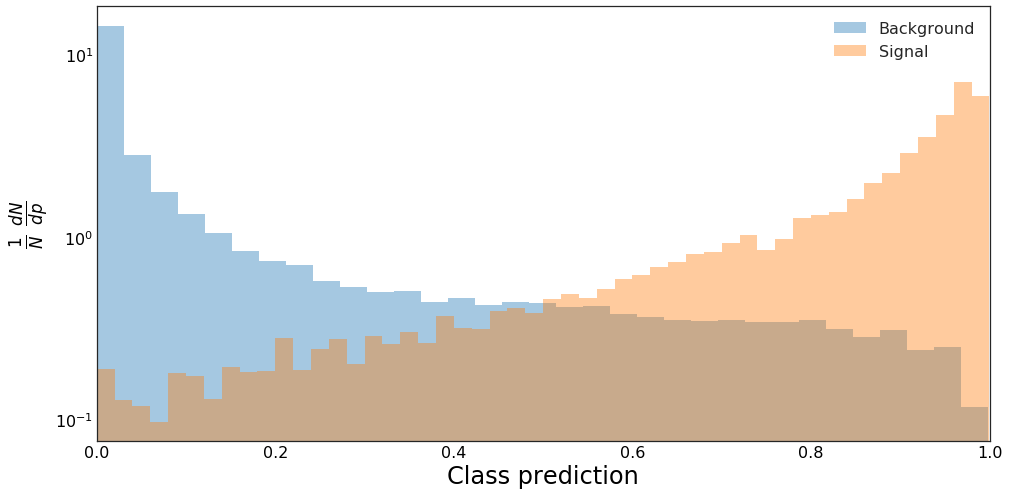

In [155]:
getClassPredPlot([valframe[bkgVal], valframe[sigVal]], weightName='gen_weight')

In [158]:
valframe['ams'] = amsScan(valframe)[0]

[0.9624179601669312, 1.731014944895299]


In [159]:
bests = foldAMSScan(valframe, 10)

[0.9677096009254456, 1.9572888625523495]
Fold 0, best AMS 1.95728886255 at cut of 0.967709600925. Total weights Signal:Bkg. 14.0388698578:8125.10205078


/home/giles/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/giles/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[0.9711708426475525, 1.9557357032427916]
Fold 1, best AMS 1.95573570324 at cut of 0.971170842648. Total weights Signal:Bkg. 13.6926288605:8134.37207031
[0.9881527423858643, 2.059812669783092]
Fold 2, best AMS 2.05981266978 at cut of 0.988152742386. Total weights Signal:Bkg. 13.5842037201:8139.16259766
[0.9321272373199463, 2.012897088850711]
Fold 3, best AMS 2.01289708885 at cut of 0.93212723732. Total weights Signal:Bkg. 13.5831699371:8103.15917969
[0.8924405574798584, 1.5743026671677414]
Fold 4, best AMS 1.57430266717 at cut of 0.89244055748. Total weights Signal:Bkg. 13.974814415:8105.37597656
[0.971046507358551, 1.9976157407784798]
Fold 5, best AMS 1.99761574078 at cut of 0.971046507359. Total weights Signal:Bkg. 13.7373695374:8181.07080078
[0.9838069081306458, 1.8628782558661696]
Fold 6, best AMS 1.86287825587 at cut of 0.983806908131. Total weights Signal:Bkg. 13.9395246506:8246.11132812
[0.9179080724716187, 1.8013980902030848]
Fold 7, best AMS 1.8013980902 at cut of 0.91790807247

In [161]:
batchEnsemblePredict(ensemble, weights, ReflectBatch(classTrainFeatures, h5py.File(dirLoc + 'testing.hdf5', "r+")), ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.00198861576427s per sample

Predicting batch 2 out of 10
Prediction took 0.0019343967091s per sample

Predicting batch 3 out of 10
Prediction took 0.00234538394321s per sample

Predicting batch 4 out of 10
Prediction took 0.00195753172961s per sample

Predicting batch 5 out of 10
Prediction took 0.00177036276297s per sample

Predicting batch 6 out of 10
Prediction took 0.0018315791997s per sample

Predicting batch 7 out of 10
Prediction took 0.00185475665439s per sample

Predicting batch 8 out of 10
Prediction took 0.00196741725315s per sample

Predicting batch 9 out of 10
Prediction took 0.00197336405407s per sample

Predicting batch 10 out of 10
Prediction took 0.00191805016344s per sample



In [177]:
saveTest(0.956111737149703, 'Day_8_new')

../Data/Day_8_new_test.csv


In [176]:
!kaggle competitions submit -c higgs-boson -f ../Data/Day_8_new_test.csv -m"Day_8 IM TTA"

Successfully submitted to Higgs Boson Machine Learning Challenge